INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.00954 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.00930 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.04005 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.05960 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ElidePermutations - 0.00739 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: RemoveDiagonalGatesBeforeMeasure - 0.05603 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.14257 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutationAnalysis - 0.29731 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutativeCancellation - 0.24939 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Collect2qBlocks - 0.08059 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ConsolidateBlocks - 0.44608 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Split2QUnitaries - 0.05579 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.01001 (ms)
INFO:qiskit.passm

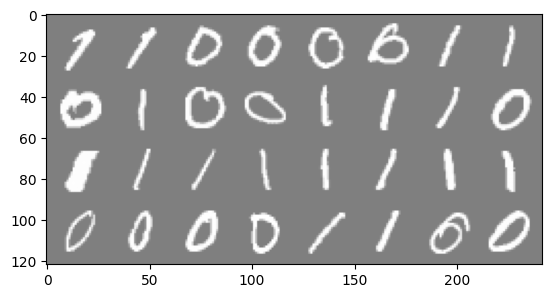

In [1]:

from ionqvision.ansatze.ansatz_library import AngleEncoder

encoder = AngleEncoder(num_qubits=4)
encoder.draw("mpl")
from ionqvision.ansatze.ansatz_library import QCNNAnsatz

ansatz = QCNNAnsatz(num_qubits=4)
ansatz.draw("mpl")
from qiskit.quantum_info import SparsePauliOp

# Measure the expectation value of X_0, Y_0, Z_0
quantum_features = [
    SparsePauliOp(["IIIX"]), 
    SparsePauliOp(["IIIY"]), 
    SparsePauliOp(["IIIZ"])
]
from ionqvision.modules import BinaryMNISTClassifier

# Set up your classifier and inspect its architecture
# BinaryMNISTClassifier uses the encoder, quantum ansatz, and quantum features
# It combines the quantum and classical neural network layers for binary classification
classifier = BinaryMNISTClassifier(encoder, ansatz, quantum_features); classifier
import logging
# Suppress unnecessary logging to focus on the critical outputs during training
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
# Check out your quantum layer
classifier.quantum_layer.layer_qc.draw("mpl")
# Verify the images loaded correctly
classifier.visualize_batch()
%%time
# Get a (pre-processed) training and test set
# In this case, we are using 300 images for training and 100 for testing
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# Configure model training hyper parameters
config = {
    "epochs": 10,  # Number of passes through the entire training dataset
    "lr": 0.01,    # Learning rate for the Adam optimizer
    "batch_size": 55,  # Number of images in each training batch
    "betas": (0.9, 0.99),  # Parameters for controlling momentum and smoothing
    "weight_decay": 1e-3,  # Parameter to avoid overfitting
    "clip_grad": True,     # Gradient clipping to prevent exploding gradients
    "log_interval": 6,     # Interval for logging during training
}

# Train and plot the results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()

In [ ]:
%%time
# Get a (pre-processed) training and test set
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# Configure model training hyper parameters
config = {
    "epochs": 10,
    "lr": 0.01,
    "batch_size": 55,
    "betas": (0.9, 0.99),
    "weight_decay": 1e-3,
    "clip_grad": True,
    "log_interval": 6,
}

# Train and plot the results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()

epoch:   1 | loss: 0.699
lr: 0.0100 | processed     6/    6 batches per epoch in 406.27s (1.21s forward / 28.92s backward)
Model achieved 51.333%  accuracy on TRAIN set.
Model achieved 50.000%  accuracy on TEST set.

epoch:   2 | loss: 0.687
lr: 0.0100 | processed     6/    6 batches per epoch in 380.35s (1.57s forward / 28.45s backward)
Model achieved 49.667%  accuracy on TRAIN set.
Model achieved 45.000%  accuracy on TEST set.

epoch:   3 | loss: 0.685
lr: 0.0100 | processed     6/    6 batches per epoch in 404.27s (1.15s forward / 28.77s backward)
Model achieved 46.333%  accuracy on TRAIN set.
Model achieved 45.000%  accuracy on TEST set.

epoch:   4 | loss: 0.681
lr: 0.0100 | processed     6/    6 batches per epoch in 400.33s (1.18s forward / 28.21s backward)
Model achieved 44.333%  accuracy on TRAIN set.
Model achieved 48.000%  accuracy on TEST set.

epoch:   5 | loss: 0.676
lr: 0.0100 | processed     6/    6 batches per epoch in 406.17s (1.61s forward / 28.80s backward)
Model ach

epoch:  11 | loss: 0.700
lr: 0.0100 | processed     6/    6 batches per epoch in 406.86s (1.12s forward / 27.49s backward)
Model achieved 43.667%  accuracy on TRAIN set.
Model achieved 45.000%  accuracy on TEST set.

epoch:  12 | loss: 0.674
lr: 0.0100 | processed     6/    6 batches per epoch in 396.51s (1.53s forward / 38.40s backward)
Model achieved 41.667%  accuracy on TRAIN set.
Model achieved 44.000%  accuracy on TEST set.

epoch:  13 | loss: 0.671
lr: 0.0100 | processed     6/    6 batches per epoch in 366.31s (1.10s forward / 26.59s backward)
Model achieved 43.667%  accuracy on TRAIN set.
Model achieved 45.000%  accuracy on TEST set.

epoch:  14 | loss: 0.668
lr: 0.0100 | processed     6/    6 batches per epoch in 395.20s (1.23s forward / 27.07s backward)
Model achieved 45.333%  accuracy on TRAIN set.
Model achieved 49.000%  accuracy on TEST set.

epoch:  15 | loss: 0.660
lr: 0.0100 | processed     6/    6 batches per epoch in 393.27s (1.36s forward / 26.90s backward)
Model ach

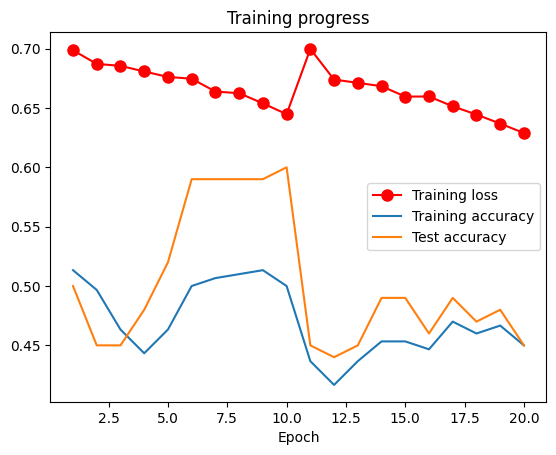

In [3]:
%%time
# Get a (pre-processed) training and test set
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# Configure model training hyper parameters
config = {
    "epochs": 10,
    "lr": 0.01,
    "batch_size": 55,
    "betas": (0.9, 0.99),
    "weight_decay": 1e-3,
    "clip_grad": True,
    "log_interval": 6,
}

# Train and plot the results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()